<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Testing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [6]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Upload file dataset dari lokal
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model.h5


In [7]:
# Load the model
model = tf.keras.models.load_model('model.h5')

In [8]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[0]))
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    counter+=1

input = np.array(input)

print(input)

[[1.0000e+00 0.0000e+00 0.0000e+00 2.7690e+01 8.1610e+01 1.0880e+01
  3.4400e+00 1.3850e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7210e+01 8.3070e+01 1.7450e+01
  5.4100e+00 2.3129e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7640e+01 8.3290e+01 1.6030e+01
  5.2000e+00 3.0824e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8960e+01 7.7000e+01 1.0370e+01
  8.1400e+00 8.1840e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8750e+01 7.4480e+01 0.0000e+00
  8.1100e+00 1.3213e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7910e+01 7.5970e+01 4.6100e+00
  8.1900e+00 1.8685e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.6660e+01 7.4260e+01 0.0000e+00
  9.0400e+00 8.6520e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.6670e+01 7.1900e+01 0.0000e+00
  8.9500e+00 1.6081e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8050e+01 6.8300e+01 7.2000e-01
  8.0000e+00 2.0726e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.9350e+01 6.7000e+01 0.0000e+00
  8.7300e+00 2.2540e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.9510e+01 7.3500e+01 6.9700e+00
  

In [9]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[14]))
    counter+=1

output = np.array(output)

print(output)

[[  5209.48]
 [ 86975.4 ]
 [115862.16]
 [ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 15928.9 ]
 [  9757.82]
 [ 45069.81]
 [ 45451.84]
 [ 26473.66]
 [ 11069.01]
 [ 22321.44]
 [ 32151.33]
 [ 28035.94]
 [ 21473.32]
 [ 17215.7 ]
 [ 20620.07]
 [  8919.26]
 [ 17647.85]
 [ 88166.98]
 [ 53368.58]
 [  5963.89]
 [ 22567.4 ]
 [ 26090.58]
 [ 13280.79]
 [ 30596.29]
 [ 38858.77]
 [ 10700.88]
 [  7964.59]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [ 24683.18]
 [ 10217.73]
 [ 24777.63]
 [ 51528.42]
 [ 29243.91]
 [ 10147.88]
 [  9540.8 ]
 [ 20361.59]
 [ 27265.68]
 [ 27366.8 ]
 [ 12511.74]
 [  8128.77]
 [ 11590.42]
 [ 18216.62]
 [ 41044.27]
 [ 85570.82]
 [ 19437.87]
 [ 10804.02]
 [ 21359.23]
 [ 15103.27]
 [ 13768.52]
 [ 43813.82]
 [ 12969.53]
 [  4995.64]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]

In [10]:
# Bagi data untuk training, validasi dan testing
split_scaled = 72

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

72
36


In [11]:
# Normalisasi data
split_valid = 36

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])
input_test_scaled = scaler_input.transform(input_test)

print(input_train_scaled)
print(input_valid_scaled)
print(input_test_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])
output_test_scaled = scaler_output.transform(output_test)

print(output_train_scaled)
print(output_valid_scaled)

[[1.         0.         0.         0.44104803 0.72981651 0.49342404
  0.07771261 0.03202578]
 [1.         0.         0.         0.33624454 0.79678899 0.79138322
  0.36656891 0.7469832 ]
 [1.         0.         0.         0.430131   0.80688073 0.72698413
  0.33577713 1.        ]
 [1.         0.         0.         0.71834061 0.51834862 0.47029478
  0.76686217 0.25558149]
 [1.         0.         0.         0.67248908 0.40275229 0.
  0.76246334 0.42093841]
 [1.         0.         0.         0.48908297 0.47110092 0.20907029
  0.77419355 0.60086147]
 [1.         0.         0.         0.21615721 0.39266055 0.
  0.89882698 0.27096965]
 [1.         0.         0.         0.21834061 0.28440367 0.
  0.8856305  0.51524019]
 [1.         0.         0.         0.51965066 0.11926606 0.03265306
  0.74633431 0.66797093]
 [1.         0.         0.         0.80349345 0.05963303 0.
  0.85337243 0.06059909]
 [1.         0.         0.         0.83842795 0.35779817 0.31609977
  0.50439883 0.00917371]
 [1.     

In [12]:
# Input dari data testing
testing_data=[]
counter=0
number_of_testing=[]
number=1

for x in input_test_scaled:
  testing_data.append([])
  for y in x:
    testing_data[counter].append(y)
  counter+=1
  number_of_testing.append(number)
  number+=1

total_of_testing=len(input_test_scaled)
print(total_of_testing)
print(number_of_testing)

36
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [13]:
# Output dari data validasi
output_test_transform=[]
counter=0

for i in output_test_scaled:
  output_test_transform.append([])
  for x in i:
    output_test_transform[counter].append([])
    output_test_transform[counter][0].append(i[0])
  counter+=1

print(output_test_transform)

[[[-0.0038809571335021234]], [[0.06980198626563151]], [[0.8291226743147699]], [[0.8925030904080039]], [[0.21090572592195714]], [[0.3129455702984651]], [[0.4204705824674938]], [[0.7653249218205567]], [[0.47984598737222517]], [[0.23605271728282226]], [[0.010825095163555247]], [[-0.0018817345505863902]], [[0.12881030672956043]], [[0.048247309681644195]], [[0.04350025038433119]], [[0.3091092621191269]], [[0.4421044015114109]], [[0.18983028144599576]], [[0.062279600505671294]], [[0.10840380864333717]], [[0.24422198759634542]], [[0.3756634309306943]], [[0.1176319595462966]], [[0.08221894796558354]], [[0.07315669856878217]], [[0.15744709536666424]], [[0.27697260830435527]], [[0.5711679816221403]], [[0.3619955105914323]], [[0.09673554862183562]], [[0.12422372102633061]], [[0.16139126141174742]], [[0.19128513697598762]], [[0.3392485318373307]], [[0.05219191346157213]], [[0.04133757761038798]]]


In [14]:
# Prediksi data testing
output_prediksi=[]
output_testing=[]

for i in range(total_of_testing):
  input_prediksi=[]
  input_prediksi.append([])
  for y in testing_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  testing = scaler_output.inverse_transform(output_test_transform[i])
  output_testing.append(testing[0][0])

print(output_prediksi)
print(output_testing)

[2517.6472, 10189.154, 95160.05, 104076.016, 29561.496, 36981.023, 50940.094, 96996.72, 48888.14, 24792.883, 2061.7888, 6766.211, 17623.87, 8805.479, 8318.456, 38952.5, 54911.598, 25786.986, 11446.963, 16524.033, 32848.664, 48619.492, 17353.303, 11922.857, 9315.738, 17797.85, 32587.889, 69221.9, 48158.613, 12166.544, 17370.115, 22133.229, 18861.371, 33360.46, 7825.9917, 6921.986]
[1194.46, 9610.85, 96343.8, 103583.39, 25728.34, 37383.78, 49665.76, 89056.54, 56447.88, 28600.74, 2874.25, 1422.82, 16351.04, 7148.78, 6606.55, 36945.58, 52136.87, 23321.01, 8751.61, 14020.12, 29533.87, 44547.69, 15074.2, 11029.17, 9994.04, 19622.06, 33274.79, 66879.08, 42986.48, 12687.32, 15827.139999999998, 20072.58, 23487.19, 40388.22, 7599.349999999999, 6359.52]


In [15]:
# Split output prediksi dan validasi berdasarkan Kabupaten
output_prediksi_lamongan = output_prediksi[:12]
output_prediksi_banyuwangi = output_prediksi[12:24]
output_prediksi_tuban = output_prediksi[24:36]
output_testing_lamongan = output_testing[:12]
output_testing_banyuwangi = output_testing[12:24]
output_testing_tuban = output_testing[24:36]
number_of_testing = number_of_testing[:12]

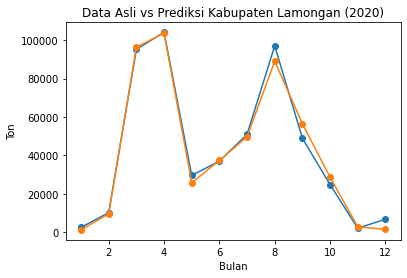

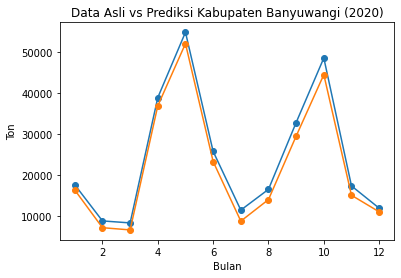

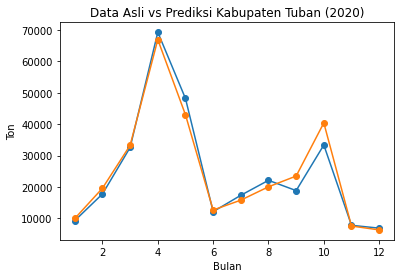

In [16]:
# Grafik garis dari total produksi beras tiap Kabupaten

# Kabupaten Lamongan
plt.plot(number_of_testing,output_prediksi_lamongan,marker='o')
plt.plot(number_of_testing,output_testing_lamongan,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Lamongan (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Banyuwangi
plt.plot(number_of_testing,output_prediksi_banyuwangi,marker='o')
plt.plot(number_of_testing,output_testing_banyuwangi,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Banyuwangi (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Tuban
plt.plot(number_of_testing,output_prediksi_tuban,marker='o')
plt.plot(number_of_testing,output_testing_tuban,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Tuban (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

In [17]:
# Input data Konsumsi
input_konsumsi = []
number=1

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input_konsumsi.append(float(row[15]))
    number+=1

input_konsumsi_testing_lamongan = input_konsumsi[72:84]
input_konsumsi_testing_banyuwangi = input_konsumsi[84:96]
input_konsumsi_testing_tuban = input_konsumsi[96:108]

In [18]:
# Output Saran Kabupaten Lamongan
counter=0

for i in output_prediksi_lamongan:
  total_beras_distribusi_lamongan = i - input_konsumsi_testing_lamongan[counter]
  if (total_beras_distribusi_lamongan>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus mendistribusikan beras sebesar " +str(total_beras_distribusi_lamongan)+" ke wilayah lain." )
  elif (total_beras_distribusi_lamongan<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_lamongan))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Lamongan harus didistribusikan beras sebesar 9381.802383203125 dari wilayah lain.
Pada bulan 2, Kabupaten Lamongan harus didistribusikan beras sebesar 1049.2147731250006 dari wilayah lain.
Pada bulan 3, Kabupaten Lamongan harus mendistribusikan beras sebesar 83260.59727500001 ke wilayah lain.
Pada bulan 4, Kabupaten Lamongan harus mendistribusikan beras sebesar 92507.106295 ke wilayah lain.
Pada bulan 5, Kabupaten Lamongan harus mendistribusikan beras sebesar 17662.04649375 ke wilayah lain.
Pada bulan 6, Kabupaten Lamongan harus mendistribusikan beras sebesar 25412.114107499998 ke wilayah lain.
Pada bulan 7, Kabupaten Lamongan harus mendistribusikan beras sebesar 39040.64415 ke wilayah lain.
Pada bulan 8, Kabupaten Lamongan harus mendistribusikan beras sebesar 85097.26915000001 ke wilayah lain.
Pada bulan 9, Kabupaten Lamongan harus mendistribusikan beras sebesar 37319.231295 ke wilayah lain.
Pada bulan 10, Kabupaten Lamongan harus mendistribusikan beras sebesar

In [19]:
# Output Saran Kabupaten Banyuwangi
counter=0

for i in output_prediksi_banyuwangi:
  total_beras_distribusi_banyuwangi = i - input_konsumsi_testing_banyuwangi[counter]
  if (total_beras_distribusi_banyuwangi>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus mendistribusikan beras sebesar " +str(total_beras_distribusi_banyuwangi)+" ke wilayah lain." )
  elif (total_beras_distribusi_banyuwangi<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_banyuwangi))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 2502.499030625 ke wilayah lain.
Pada bulan 2, Kabupaten Banyuwangi harus didistribusikan beras sebesar 5475.815474375 dari wilayah lain.
Pada bulan 3, Kabupaten Banyuwangi harus didistribusikan beras sebesar 6802.9140553125 dari wilayah lain.
Pada bulan 4, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 24251.16795 ke wilayah lain.
Pada bulan 5, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 39790.22754625 ke wilayah lain.
Pada bulan 6, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 11085.654278125 ke wilayah lain.
Pada bulan 7, Kabupaten Banyuwangi harus didistribusikan beras sebesar 3674.407219375 dari wilayah lain.
Pada bulan 8, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 1402.6630931250002 ke wilayah lain.
Pada bulan 9, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 18147.3320125 ke wilayah lain.
Pada bulan 10, Kabupaten Banyuwangi harus mendistribusikan 

In [20]:
# Output Saran Kabupaten Tuban
counter=0

for i in output_prediksi_tuban:
  total_beras_distribusi_tuban = i - input_konsumsi_testing_tuban[counter]
  if (total_beras_distribusi_tuban>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus mendistribusikan beras sebesar " +str(total_beras_distribusi_tuban)+" ke wilayah lain." )
  elif (total_beras_distribusi_tuban<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_tuban))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Tuban harus didistribusikan beras sebesar 1289.86698875 dari wilayah lain.
Pada bulan 2, Kabupaten Tuban harus mendistribusikan beras sebesar 7781.444629375001 ke wilayah lain.
Pada bulan 3, Kabupaten Tuban harus mendistribusikan beras sebesar 21982.283401875 ke wilayah lain.
Pada bulan 4, Kabupaten Tuban harus mendistribusikan beras sebesar 58910.8933075 ke wilayah lain.
Pada bulan 5, Kabupaten Tuban harus mendistribusikan beras sebesar 37553.00801125 ke wilayah lain.
Pada bulan 6, Kabupaten Tuban harus mendistribusikan beras sebesar 1855.5388153125004 ke wilayah lain.
Pada bulan 7, Kabupaten Tuban harus mendistribusikan beras sebesar 6764.509964375 ke wilayah lain.
Pada bulan 8, Kabupaten Tuban harus mendistribusikan beras sebesar 11527.623245625 ke wilayah lain.
Pada bulan 9, Kabupaten Tuban harus mendistribusikan beras sebesar 8550.36596375 ke wilayah lain.
Pada bulan 10, Kabupaten Tuban harus mendistribusikan beras sebesar 22754.8556675 ke wilayah lain.
Pad